**Fashion MNIST**

Fashion MNIST是一個涵蓋10個種類的服飾正面灰階圖片 (28*28)，主要為Zalando所release的dataset，很適合大家一開始用來嘗試各式各樣的model。而TF.keras.dataset的api已經整理很乾淨。因此，若使用的都可以直接call api，就可以下載dataset到local做使用

In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from tensorflow import keras
from tensorflow.keras import datasets,layers,optimizers,Sequential,metrics

In [10]:
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()
print(x.shape, y.shape)
#Output: x -> (60000, 28, 28)  y -> (60000,)

(60000, 28, 28) (60000,)


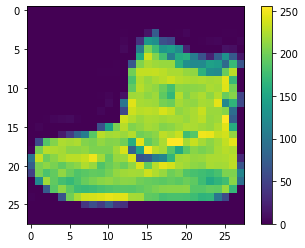

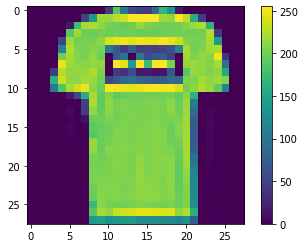

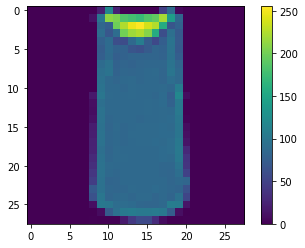

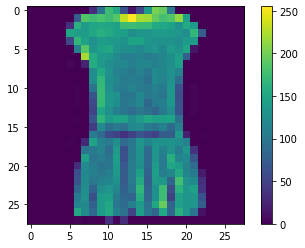

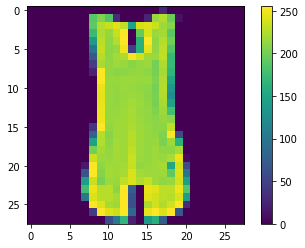

In [11]:
#接下來稍微看一下圖片長什麼樣子
for i in range(5):
  plt.figure()
  plt.imshow(x[i])
  plt.colorbar()
  plt.grid(False)

In [12]:
data = tf.data.Dataset.from_tensor_slices((x,y))

def feature_scale(x,y):
  x = tf.cast(x,dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  return x,y

data = data.map(feature_scale).shuffle(10000).batch(128)

In [13]:
#建立好Dataset之後，就是將資料迭代化，這是tf.data api的特色。建立Dataset -> 資料迭代化 -> 放進Model
data_iter = iter(data)
samples = next(data_iter)
print(samples[0].shape, samples[1].shape)

(128, 28, 28) (128,)


In [14]:
#接下來就可以跟上一篇一樣定義Model，以及想使用的optimizer
model = Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(10,activation=tf.nn.relu)
])

model.build(input_shape=[None,28*28])

model.summary()
optimizer = optimizers.Adam(lr=1e-3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [16]:
with tf.GradientTape() as tape:
  		logits = model(x)
    	y_one_hot = tf.one_hot(y, depth=10)
      loss = tf.losses.categorical_crossentropy(y_one_hot,logits,from_logits=True)
      loss = tf.reduce_mean(loss)
      
grads = tape.gradient(loss,model.trainable_variables)
optimizer.apply_gradients(zip(grads,model.trainable_variables))

IndentationError: ignored

In [ ]:
 x = tf.reshape(x,[-1,28*28])
  
gd = model(x)
prob = tf.nn.softmax(gd,axis=1)
pred = tf.argmax(prob,axis=1)

pred = tf.cast(pred,dtype=tf.int32)
correct = tf.equal(pred,y)

result = tf.reduce_sum(tf.cast(correct,dtype=tf.int32))

total_loss += int(result)